In [21]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [10]:
df_beauty=pd.read_json('./with_dataset/beauty.json')
df_ugly=pd.read_json('./with_dataset/ugly.json')

In [11]:
df_beauty.head()

,file_path,like_count
0,./with_dataset/face_imgs/8547256381/8547256381...,95
1,./with_dataset/face_imgs/1517626981/1517626981...,138
10,./with_dataset/face_imgs/6857482692/6857482692...,183
100,./with_dataset/face_imgs/6774584757/6774584757...,541
1000,./with_dataset/face_imgs/8748596057/8748596057...,185


In [24]:
output_dir = "./with_dataset/ugly_class/"
if not(os.path.exists(output_dir)):
    os.mkdir(output_dir)
for i,df in df_ugly.iterrows():
    file_path=df['file_path']
    img=cv2.imread(file_path)
    cv2.imwrite('{0}{1}.jpg'.format(output_dir,i),img)

In [25]:
files=os.listdir(output_dir)
len(files)

4335

In [19]:
def draw_images(generator, x, dir_name, index):
    save_name = 'extened-' + str(index)
    g = generator.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=save_name, save_format='jpg')
    # 1つの入力画像から何枚拡張するかを指定
    # g.next()の回数分拡張される
    for i in range(5):
        bach = g.next()

In [26]:
output_dir = "ugly_extended"
if not(os.path.exists(output_dir)):
    os.mkdir(output_dir)
# 拡張する画像群の読み込み
images = glob.glob(os.path.join('./with_dataset/ugly_class/', "*.jpg"))
# 拡張する際の設定
generator = ImageDataGenerator(
                rotation_range=30, # 90°まで回転
                width_shift_range=0.1, # 水平方向にランダムでシフト
                height_shift_range=0.1, # 垂直方向にランダムでシフト
#                 channel_shift_range=50.0, # 色調をランダム変更
#                shear_range=0.39, # 斜め方向(pi/8まで)に引っ張る
                horizontal_flip=True, # 垂直方向にランダムで反転
#                 vertical_flip=True, # 水平方向にランダムで反転
                samplewise_center=False,
                featurewise_std_normalization=False,
                samplewise_std_normalization=False,
                zca_whitening=True, #ZCA白色化
                zca_epsilon=1e-6, #ZCAのパラメータ 
                zoom_range=0.1,
                channel_shift_range=0.,
                fill_mode='nearest',
                cval=0.,
                rescale=None,
                )

# 読み込んだ画像を順に拡張
for i in range(len(images)):
    img = load_img(images[i])
    # 画像を配列化して転置a
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # 画像の拡張
    draw_images(generator, x, output_dir, i)

/Users/Koki/.pyenv/versions/anaconda3-4.3.1/envs/tf-cpu/lib/python3.5/site-packages/keras/preprocessing/image.py:523: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [23]:
a=os.listdir('beauty_extended/')
len(a)

21563

### 以下の部分は過去の遺産なので基本無視

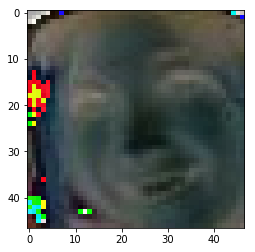

In [4]:
im=plt.imread('./with_dataset/face_imgs/8547256381/8547256381__thumb_image_170921164604.jpg')
plt.imshow(im-im.mean())
plt.show()

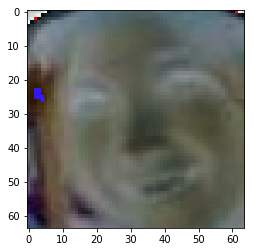

In [5]:
image = cv.imread('./with_dataset/face_imgs/8547256381/8547256381__thumb_image_170921164604.jpg')
image = cv.resize(image, (64, 64))
# image = image.transpose(2,0,1)
image = image-image.mean() #0~1に収める
plt.imshow(image)
plt.show()

In [31]:
X_beauty=[]
for i,df in df_beauty.iterrows():
    file_path=df['file_path']
    image = cv.imread(file_path)
    print(np.array(image).shape)
    image = cv.resize(image, (128, 128))
#     print(np.array(image).shape)
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
#     image = image.transpose(2,0,1)
    image = image_gray/255.
#     print(np.array(image).shape)

#     image[0] = (image[0]-image[0].mean())
#     image[1] = (image[1]-image[1].mean())
#     image[2] = (image[2]-image[2].mean())
    X_beauty.append(image)
facedata_arr=np.array(X_beauty) #データもnpの配列に格納
# np.save('beauty_face128_gray.npy',facedata_arr)

(47, 47, 3)
(212, 212, 3)
(128, 128, 3)
(157, 157, 3)
(187, 187, 3)
(155, 155, 3)
(45, 45, 3)
(87, 87, 3)
(47, 47, 3)
(86, 86, 3)
(244, 244, 3)
(189, 189, 3)
(142, 142, 3)
(126, 126, 3)
(103, 103, 3)
(53, 53, 3)
(172, 172, 3)
(124, 124, 3)
(48, 48, 3)
(48, 48, 3)
(147, 147, 3)
(72, 72, 3)
(93, 93, 3)
(77, 77, 3)
(74, 74, 3)
(171, 171, 3)
(54, 54, 3)
(41, 41, 3)
(56, 56, 3)
(166, 166, 3)
(111, 111, 3)
(237, 237, 3)
(242, 242, 3)
(99, 99, 3)
(161, 161, 3)
(251, 251, 3)
(390, 390, 3)
(229, 229, 3)
(111, 111, 3)
(359, 359, 3)
(48, 48, 3)
(267, 267, 3)
(59, 59, 3)
(148, 148, 3)
(108, 108, 3)
(392, 392, 3)
(48, 48, 3)
(243, 243, 3)
(117, 117, 3)
(156, 156, 3)
(66, 66, 3)
(75, 75, 3)
(55, 55, 3)
(132, 132, 3)
(211, 211, 3)
(222, 222, 3)
(225, 225, 3)
(180, 180, 3)
(224, 224, 3)
(203, 203, 3)
(56, 56, 3)
(272, 272, 3)
(118, 118, 3)
(41, 41, 3)
(72, 72, 3)
(74, 74, 3)
(70, 70, 3)
(191, 191, 3)
(233, 233, 3)
(196, 196, 3)
(37, 37, 3)
(245, 245, 3)
(233, 233, 3)
(68, 68, 3)
(232, 232, 3)
(266, 26

In [14]:
np.array(X_beauty).shape

(4314, 128, 128)

In [25]:
print(X_beauty)

[array([[ 0.99607843,  0.99607843,  0.99607843, ...,  0.85882353,
         0.89803922,  0.90196078],
       [ 0.99607843,  0.99607843,  0.99215686, ...,  0.84313725,
         0.88235294,  0.88627451],
       [ 0.98431373,  0.98431373,  0.96862745, ...,  0.74117647,
         0.78431373,  0.79215686],
       ..., 
       [ 0.4627451 ,  0.4627451 ,  0.47058824, ...,  0.29019608,
         0.27843137,  0.27843137],
       [ 0.47843137,  0.47843137,  0.47058824, ...,  0.27843137,
         0.2627451 ,  0.25882353],
       [ 0.48235294,  0.47843137,  0.46666667, ...,  0.27843137,
         0.2627451 ,  0.25882353]]), array([[ 0.12941176,  0.15294118,  0.16470588, ...,  0.66666667,
         0.61960784,  0.58039216],
       [ 0.12156863,  0.16470588,  0.16470588, ...,  0.77254902,
         0.78823529,  0.79607843],
       [ 0.11372549,  0.15686275,  0.15686275, ...,  0.71372549,
         0.69803922,  0.78431373],
       ..., 
       [ 0.04705882,  0.05490196,  0.05490196, ...,  0.07843137,
      

In [ ]:
X_

In [17]:
X_ugly=[]
for i,df in df_ugly.iterrows():
    file_path=df['file_path']
    image = cv.imread(file_path)
    image = cv.resize(image, (128, 128))
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

#     image = image.transpose(2,0,1)
    image = image_gray/255. #0~1に収める
#     image[0] = (image[0]-image[0].mean())
#     image[1] = (image[1]-image[1].mean())
#     image[2] = (image[2]-image[2].mean())
    X_ugly.append(image)
facedata_arr=np.array(X_ugly) #データもnpの配列に格納
np.save('ugly_face128_gray.npy',facedata_arr)

In [18]:
np.array(X_ugly).shape

(4335, 128, 128)

In [20]:
Y_beauty=np.ones(len(X_beauty))
Y_ugly=np.zeros(len(X_ugly))

In [21]:
#Y_beautyとY_uglyをconcatする
Y=np.hstack((Y_beauty,Y_ugly))
np.save('face_class128_gray.npy',Y)

In [22]:
np.array(X_beauty).shape

(4314, 128, 128)

In [23]:
Xb=np.array(X_beauty)
Xu=np.array(X_ugly)

In [24]:
X=np.vstack((Xb,Xu))
np.save('face_data128_gray.npy',X)